In [1]:
# The goal of this exercise is to do Model Development and Validation to find the answer to the Question 4 of the problem statement:
# Can a predictive model be built for future prediction of the possibility of complaints of the specific type that you identified in response to Question 1?
# In this exercise, we will use a feature-engineered dataset to determine whether a predictive model can be built to predict the complaint (of the Complaint Type that we decided to focus on in Week 2) by using past data.
# Using the best model, we need to predict the number of future complaints (of the Complaint Type that you decided to focus on in Question 1).

import types
import pandas as pd
import numpy as np

df_data_1 = pd.read_csv('./NYC311data.csv')
df_data_1.head()

,created_date,unique_key,complaint_type,incident_zip,incident_address,street_name,address_type,city,resolution_description,borough,latitude,longitude,closed_date,location_type,status
0,2020-01-28T20:26:11.000,45492325,HEAT/HOT WATER,10462.0,2040 BRONXDALE AVENUE,BRONXDALE AVENUE,ADDRESS,BRONX,The complaint you filed is a duplicate of a co...,BRONX,40.850795,-73.866537,NaN,RESIDENTIAL BUILDING,Open
1,2020-01-28T15:57:56.000,45493601,UNSANITARY CONDITION,11368.0,55-02 98 STREET,98 STREET,ADDRESS,Corona,The following complaint conditions are still o...,QUEENS,40.738846,-73.862785,NaN,RESIDENTIAL BUILDING,Open
2,2020-01-28T04:49:03.000,45494360,HEAT/HOT WATER,11225.0,181 HAWTHORNE STREET,HAWTHORNE STREET,ADDRESS,BROOKLYN,The Department of Housing Preservation and Dev...,BROOKLYN,40.657592,-73.954469,2020-01-28T21:37:27.000,RESIDENTIAL BUILDING,Closed
3,2020-01-28T18:07:16.000,45493438,PLUMBING,10454.0,514 EAST 138 STREET,EAST 138 STREET,ADDRESS,BRONX,The following complaint conditions are still o...,BRONX,40.807416,-73.918919,NaN,RESIDENTIAL BUILDING,Open
4,2020-01-28T14:10:04.000,45492347,HEAT/HOT WATER,10463.0,2800 BAILEY AVENUE,BAILEY AVENUE,ADDRESS,BRONX,The complaint you filed is a duplicate of a co...,BRONX,40.873356,-73.905554,NaN,RESIDENTIAL BUILDING,Open


In [2]:
# combining Heating with Heat/Hot Water

df_data_1['complaint_type'] = np.where(df_data_1['complaint_type']=='HEATING','HEAT/HOT WATER',df_data_1['complaint_type'])

df_data_1["complaint_type"].value_counts().head()

HEAT/HOT WATER          377307
GENERAL CONSTRUCTION    141262
PLUMBING                133818
PAINT - PLASTER         103557
NONCONST                 75979
Name: complaint_type, dtype: int64

In [3]:
df_data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 15 columns):
created_date              1000000 non-null object
unique_key                1000000 non-null int64
complaint_type            1000000 non-null object
incident_zip              919319 non-null float64
incident_address          947169 non-null object
street_name               947169 non-null object
address_type              922294 non-null object
city                      919719 non-null object
resolution_description    999582 non-null object
borough                   1000000 non-null object
latitude                  919322 non-null float64
longitude                 919322 non-null float64
closed_date               982667 non-null object
location_type             947170 non-null object
status                    1000000 non-null object
dtypes: float64(3), int64(1), object(11)
memory usage: 114.4+ MB


In [4]:
df_data_1 = df_data_1[df_data_1.complaint_type == "HEAT/HOT WATER"]
df_data_1["complaint_type"].value_counts()


HEAT/HOT WATER    377307
Name: complaint_type, dtype: int64

In [5]:
# Convert created_date to datetime
df_data_1['created_date'] = pd.to_datetime(df_data_1['created_date'])
df_data_1["created_date"].head()

0   2020-01-28 20:26:11
2   2020-01-28 04:49:03
4   2020-01-28 14:10:04
5   2020-01-28 08:07:55
6   2020-01-28 21:11:02
Name: created_date, dtype: datetime64[ns]

In [6]:
df_data_1 = df_data_1[df_data_1.borough == "BRONX"]
import datetime as dt
grp = df_data_1.groupby(df_data_1.created_date.dt.year)
grp.count()

,created_date,unique_key,complaint_type,incident_zip,incident_address,street_name,address_type,city,resolution_description,borough,latitude,longitude,closed_date,location_type,status
created_date,,,,,,,,,,,,,,,
2010,33,33,33,32,33,33,33,32,18,33,32,32,6,33,33
2011,151,151,151,66,150,150,150,66,149,151,66,66,146,151,151
2012,362,362,362,127,362,362,167,127,362,362,127,127,362,362,362
2013,3782,3782,3782,0,3782,3782,11,0,3782,3782,0,0,3744,3782,3782
2015,1,1,1,0,1,1,1,0,1,1,0,0,1,1,1
2016,13,13,13,9,13,13,13,9,13,13,9,9,13,13,13
2017,6,6,6,1,6,6,6,1,6,6,1,1,6,6,6
2018,1910,1910,1910,72,1910,1910,80,72,1910,1910,72,72,1906,1910,1910
2019,25860,25860,25860,25827,25860,25860,25854,25827,25858,25860,25827,25827,25832,25860,25860


In [7]:
import matplotlib.pyplot as plt

plt.scatter(grp.count().index ,grp.count().complaint_type)
plt.show()

<Figure size 640x480 with 1 Axes>

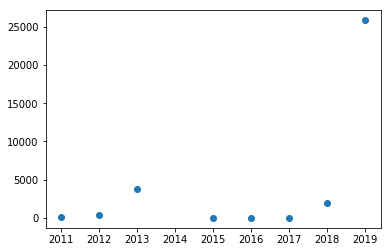

In [39]:
# removing 2020 and 2010:

plt.scatter(grp.count().index[1:-1] ,grp.count().complaint_type[1:-1])
plt.show()

In [8]:
# To predict future occurence, we will built a non linear regression model.
# define X and Y
X = grp.count().index[1:-1]
y = grp.count().complaint_type[1:-1]
X = [X.tolist()]
X

[[2011, 2012, 2013, 2015, 2016, 2017, 2018, 2019]]

In [9]:
X = np.asarray(X)

X = X.reshape(-1, 1)

In [10]:
from sklearn.linear_model import LinearRegression 
linear = LinearRegression()

In [11]:
from sklearn.preprocessing import PolynomialFeatures 
  
poly = PolynomialFeatures(degree = 3) 
X_poly = poly.fit_transform(X) 
 
linear.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

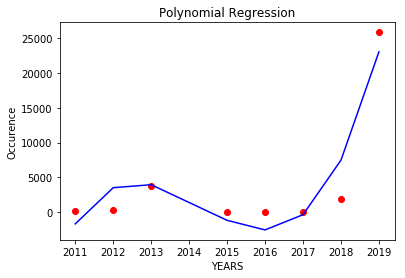

In [12]:
# Visualising the Polynomial Regression results 
plt.scatter(X, y, color = 'red') 
  
plt.plot(X, linear.predict(X_poly), color = 'blue') 
plt.title('Polynomial Regression') 
plt.xlabel('YEARS') 
plt.ylabel('Occurence') 
  
plt.show()

In [13]:
#let's predict the 2020 value
linear.predict(poly.fit_transform([[2020]]))

array([48466.98339844])

In [14]:
body = client_44482a13d1354ff08582368e448fef04.get_object(Bucket='edxss-donotdelete-pr-kh0odkrw9a31gi',Key='BX_18v1.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

# If you are reading an Excel file into a pandas DataFrame, replace `read_csv` by `read_excel` in the next statement.
df_BX = pd.read_csv(body)
df_BX.head()

df_bx_new = df_BX[["Address", "BldgArea", "BldgDepth", "BuiltFAR", "CommFAR",
             "FacilFAR", "Lot", "LotArea", "LotDepth", "NumBldgs", "NumFloors", 
             "OfficeArea", "ResArea", "ResidFAR", "RetailArea", "YearBuilt", 
             "YearAlter1", "ZipCode", "YCoord", "XCoord"]]

df_bx_new.head()


/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (19,20,22,23,64,65,80) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Address,BldgArea,BldgDepth,BuiltFAR,CommFAR,FacilFAR,Lot,LotArea,LotDepth,NumBldgs,NumFloors,OfficeArea,ResArea,ResidFAR,RetailArea,YearBuilt,YearAlter1,ZipCode,YCoord,XCoord
0,122 BRUCKNER BOULEVARD,0,0.0,0.00,5.0,6.5,1,15000,200.0,1,0.0,0,0,6.02,0,0,0,10454.0,232162.0,1005957.0
1,126 BRUCKNER BOULEVARD,752,16.0,0.05,5.0,6.5,4,13770,100.0,2,1.0,272,0,6.02,0,1931,1994,10454.0,232156.0,1006076.0
2,138 BRUCKNER BOULEVARD,39375,200.0,1.13,5.0,6.5,10,35000,200.0,1,2.0,0,0,6.02,0,1931,0,10454.0,232036.0,1006187.0
3,144 BRUCKNER BOULEVARD,12500,85.0,5.00,5.0,6.5,17,2500,100.0,1,5.0,0,12500,6.02,0,1931,2001,10454.0,232033.0,1006299.0
4,148 BRUCKNER BOULEVARD,8595,70.0,4.58,5.0,6.5,18,1875,75.0,1,5.0,0,6876,6.02,1719,1920,2009,10454.0,232040.0,1006363.0


In [15]:
# following df_final is the merged data frame from question 3 where 311 and PLUTO Bronx data were merged.

# To merge the two datasets based on address:
df_data_1["incident_address"].isnull().sum()

#drop the row which has no incident_address
df_data_1.dropna(subset = ["incident_address"], axis = 0, inplace=True)

df_data_1["complaint_type"].value_counts()

df_data_1_HEAT = df_data_1[df_data_1.complaint_type == "HEAT/HOT WATER"]

df_data_1_HEAT["complaint_type"].value_counts()

df_data_1_address = df_data_1_HEAT[["incident_address", "complaint_type"]]
#df_311_BX_address.head()

new_df = df_data_1_address.groupby(["incident_address"])

type(new_df.count())
new_df2 = new_df.count()

new_df2.columns = ["Number of Complaints"]
new_df2.head()

# drop all address entries that has occured multiple times in df_data_BX_update
df_bx_new.drop_duplicates(subset="Address", keep=False, inplace=True)

df_bx_new['Address'].value_counts().head()

# merge the two dataframes
df_final = pd.merge(new_df2, df_bx_new, left_index=True, right_on="Address", how="right")
df_final.head()

df_final["Occurence"] = df_final["Number of Complaints"]
df_final["Occurence"].replace(np.nan, 0.0, inplace = True)
df_final['Occurence'] = np.where(df_final['Occurence'] >  0, True, False)
df_final.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Number of Complaints,Address,BldgArea,BldgDepth,BuiltFAR,CommFAR,FacilFAR,Lot,LotArea,LotDepth,...,OfficeArea,ResArea,ResidFAR,RetailArea,YearBuilt,YearAlter1,ZipCode,YCoord,XCoord,Occurence
0,NaN,122 BRUCKNER BOULEVARD,0,0.0,0.00,5.0,6.5,1,15000,200.0,...,0,0,6.02,0,0,0,10454.0,232162.0,1005957.0,False
1,NaN,126 BRUCKNER BOULEVARD,752,16.0,0.05,5.0,6.5,4,13770,100.0,...,272,0,6.02,0,1931,1994,10454.0,232156.0,1006076.0,False
2,NaN,138 BRUCKNER BOULEVARD,39375,200.0,1.13,5.0,6.5,10,35000,200.0,...,0,0,6.02,0,1931,0,10454.0,232036.0,1006187.0,False
3,3.0,144 BRUCKNER BOULEVARD,12500,85.0,5.00,5.0,6.5,17,2500,100.0,...,0,12500,6.02,0,1931,2001,10454.0,232033.0,1006299.0,True
4,NaN,148 BRUCKNER BOULEVARD,8595,70.0,4.58,5.0,6.5,18,1875,75.0,...,0,6876,6.02,1719,1920,2009,10454.0,232040.0,1006363.0,False


In [16]:
df_final["Number of Complaints"].replace(np.nan, 0.0, inplace = True)
df_final['YCoord']  =  df_final.YCoord.fillna('00.00').astype(float)
df_final['XCoord']  =  df_final.XCoord.fillna('00.00').astype(float)
df_final['ZipCode']    =  df_final.ZipCode.fillna('00.00').astype(float)
df_final.isnull().sum()

#df_final.info()

Number of Complaints    0
Address                 0
BldgArea                0
BldgDepth               0
BuiltFAR                0
CommFAR                 0
FacilFAR                0
Lot                     0
LotArea                 0
LotDepth                0
NumBldgs                0
NumFloors               0
OfficeArea              0
ResArea                 0
ResidFAR                0
RetailArea              0
YearBuilt               0
YearAlter1              0
ZipCode                 0
YCoord                  0
XCoord                  0
Occurence               0
dtype: int64

In [17]:
# The most related features with complaint amounts are NumFloors, ResArea, BuiltFar, BldgArea, YearBuilt and BldgDepth. 
# A predictive model will be built based on those 6 most related features.

# Percentage of Occurence:
df_final["Occurence"].value_counts(True)

False    0.942616
True     0.057384
Name: Occurence, dtype: float64

In [18]:
df_final.isnull().sum()

Number of Complaints    0
Address                 0
BldgArea                0
BldgDepth               0
BuiltFAR                0
CommFAR                 0
FacilFAR                0
Lot                     0
LotArea                 0
LotDepth                0
NumBldgs                0
NumFloors               0
OfficeArea              0
ResArea                 0
ResidFAR                0
RetailArea              0
YearBuilt               0
YearAlter1              0
ZipCode                 0
YCoord                  0
XCoord                  0
Occurence               0
dtype: int64

In [19]:
#Check the values of NumFloors
df_final["NumFloors"].unique()
df_final["NumFloors"].value_counts()

2.00     42105
3.00     15179
1.00      8879
2.50      5072
0.00      3354
5.00      3236
6.00      2161
4.00      1700
1.50      1530
2.75      1163
1.75       715
1.67       341
7.00       231
8.00       154
9.00        77
3.50        61
12.00       49
10.00       42
14.00       41
11.00       39
13.00       37
20.00       25
16.00       24
2.67        20
3.75        18
19.00       13
21.00       12
18.00       11
15.00       11
2.25         9
22.00        7
25.00        6
30.00        5
17.00        5
33.00        2
23.00        2
28.00        2
0.50         1
1.25         1
24.00        1
31.00        1
44.00        1
1.33         1
5.50         1
29.00        1
4.50         1
42.00        1
Name: NumFloors, dtype: int64

In [20]:
# From the dataset we see that: "If the NUMBER OF FLOORS is zero and the NUMBER OF BUILDINGS is greater than zero, 
# then NUMBER OF FLOORS is not available for the tax lot. If the NUMBER OF FLOORS is zero and the NUMBER OF BUILDINGS is zero, then NUMBER OF FLOORS 
# is not applicable for the tax lot." Based on this, we decided to drop zeros from the dataset. Also, A RESIDENTIAL FLOOR AREA of zero means 
# it is either not available or not applicable." Therefore, dropping the zeros: 

df_final_new = df_final[df_final.NumFloors != 0]
df_final_new = df_final[df_final.ResArea != 0]
df_final_new.head()

,Number of Complaints,Address,BldgArea,BldgDepth,BuiltFAR,CommFAR,FacilFAR,Lot,LotArea,LotDepth,...,OfficeArea,ResArea,ResidFAR,RetailArea,YearBuilt,YearAlter1,ZipCode,YCoord,XCoord,Occurence
3,3.0,144 BRUCKNER BOULEVARD,12500,85.0,5.00,5.0,6.5,17,2500,100.00,...,0,12500,6.02,0,1931,2001,10454.0,232033.0,1006299.0,True
4,0.0,148 BRUCKNER BOULEVARD,8595,70.0,4.58,5.0,6.5,18,1875,75.00,...,0,6876,6.02,1719,1920,2009,10454.0,232040.0,1006363.0,False
25,0.0,544 EAST 134 STREET,6784,75.0,2.71,2.0,3.0,37,2500,100.00,...,0,6784,3.00,0,1920,0,10454.0,232305.0,1006421.0,False
28,4.0,147 BRUCKNER BOULEVARD,11500,96.0,4.60,2.0,3.0,45,2500,100.00,...,0,9176,3.00,2324,1925,0,10454.0,232154.0,1006412.0,True
37,0.0,180 BROOK AVENUE,1306230,48.0,6.39,0.0,4.8,19,204540,487.58,...,0,1306230,2.43,0,1956,0,10454.0,232895.0,1006598.0,False


In [21]:
df_analyze = df_final_new[["Number of Complaints", "NumFloors", "ResArea", "BuiltFAR", "BldgArea", "YearBuilt", "BldgDepth"]]
#df_analyze = df_final_new[["Number of Complaints", "NumFloors"]]
df_analyze.head()

,Number of Complaints,NumFloors,ResArea,BuiltFAR,BldgArea,YearBuilt,BldgDepth
3,3.0,5.0,12500,5.00,12500,1931,85.0
4,0.0,5.0,6876,4.58,8595,1920,70.0
25,0.0,4.0,6784,2.71,6784,1920,75.0
28,4.0,5.0,9176,4.60,11500,1925,96.0
37,0.0,16.0,1306230,6.39,1306230,1956,48.0


In [22]:
from sklearn.model_selection import train_test_split
# Logistic Regression
# split our data into train and test.
features = df_analyze.columns.tolist()
response = 'Number of Complaints'
features.remove(response)

X_train = df_analyze[features]
y_train = df_analyze[response]
# 80% train, 20% test size
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=10)

In [100]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred = knn.predict(X_train)
print('Train accuracy score:',accuracy_score(y_train,y_pred))
print('Test accuracy score:',accuracy_score(y_test,knn.predict(X_test)))

Train accuracy score: 0.9353096595157779
Test accuracy score: 0.9343303423064141


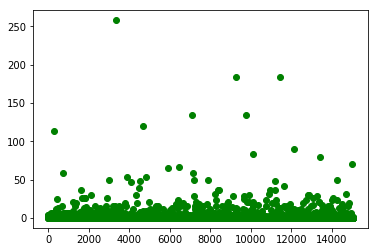

In [23]:
from sklearn.tree import DecisionTreeRegressor

from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict

# fit a model
m = DecisionTreeRegressor(random_state = 0).fit(X_train, y_train)

y_pred = m.predict(X_test)
x_grid = np.arange(0, len(y_pred), 1)
plt.scatter(x_grid, y_pred, color = "green")


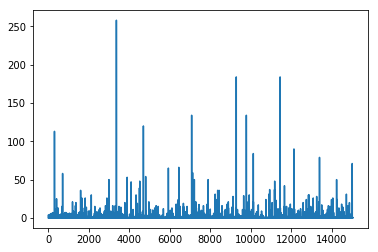

In [24]:
plt.plot(x_grid, m.predict(X_test))

In [25]:
from sklearn.metrics import mean_absolute_error
predTree = m.predict(X_train)
mean_absolute_error(y_train, predTree)

0.0368399673190758

In [26]:
import sys
!{sys.executable} -m pip install pydotplus
# import export_graphviz 
#from sklearn.tree import export_graphviz 
#import pydotplus

# Visualize data
#export_graphviz(m, out_file ='tree.dot', 
#               feature_names =features)  
#graphviz.render("dot", "png", "tree.dot") 

     |████████████████████████████████| 286kB 19.0MB/s eta 0:00:01
  Stored in directory: /home/dsxuser/.cache/pip/wheels/35/7b/ab/66fb7b2ac1f6df87475b09dc48e707b6e0de80a6d8444e3628
Successfully built pydotplus


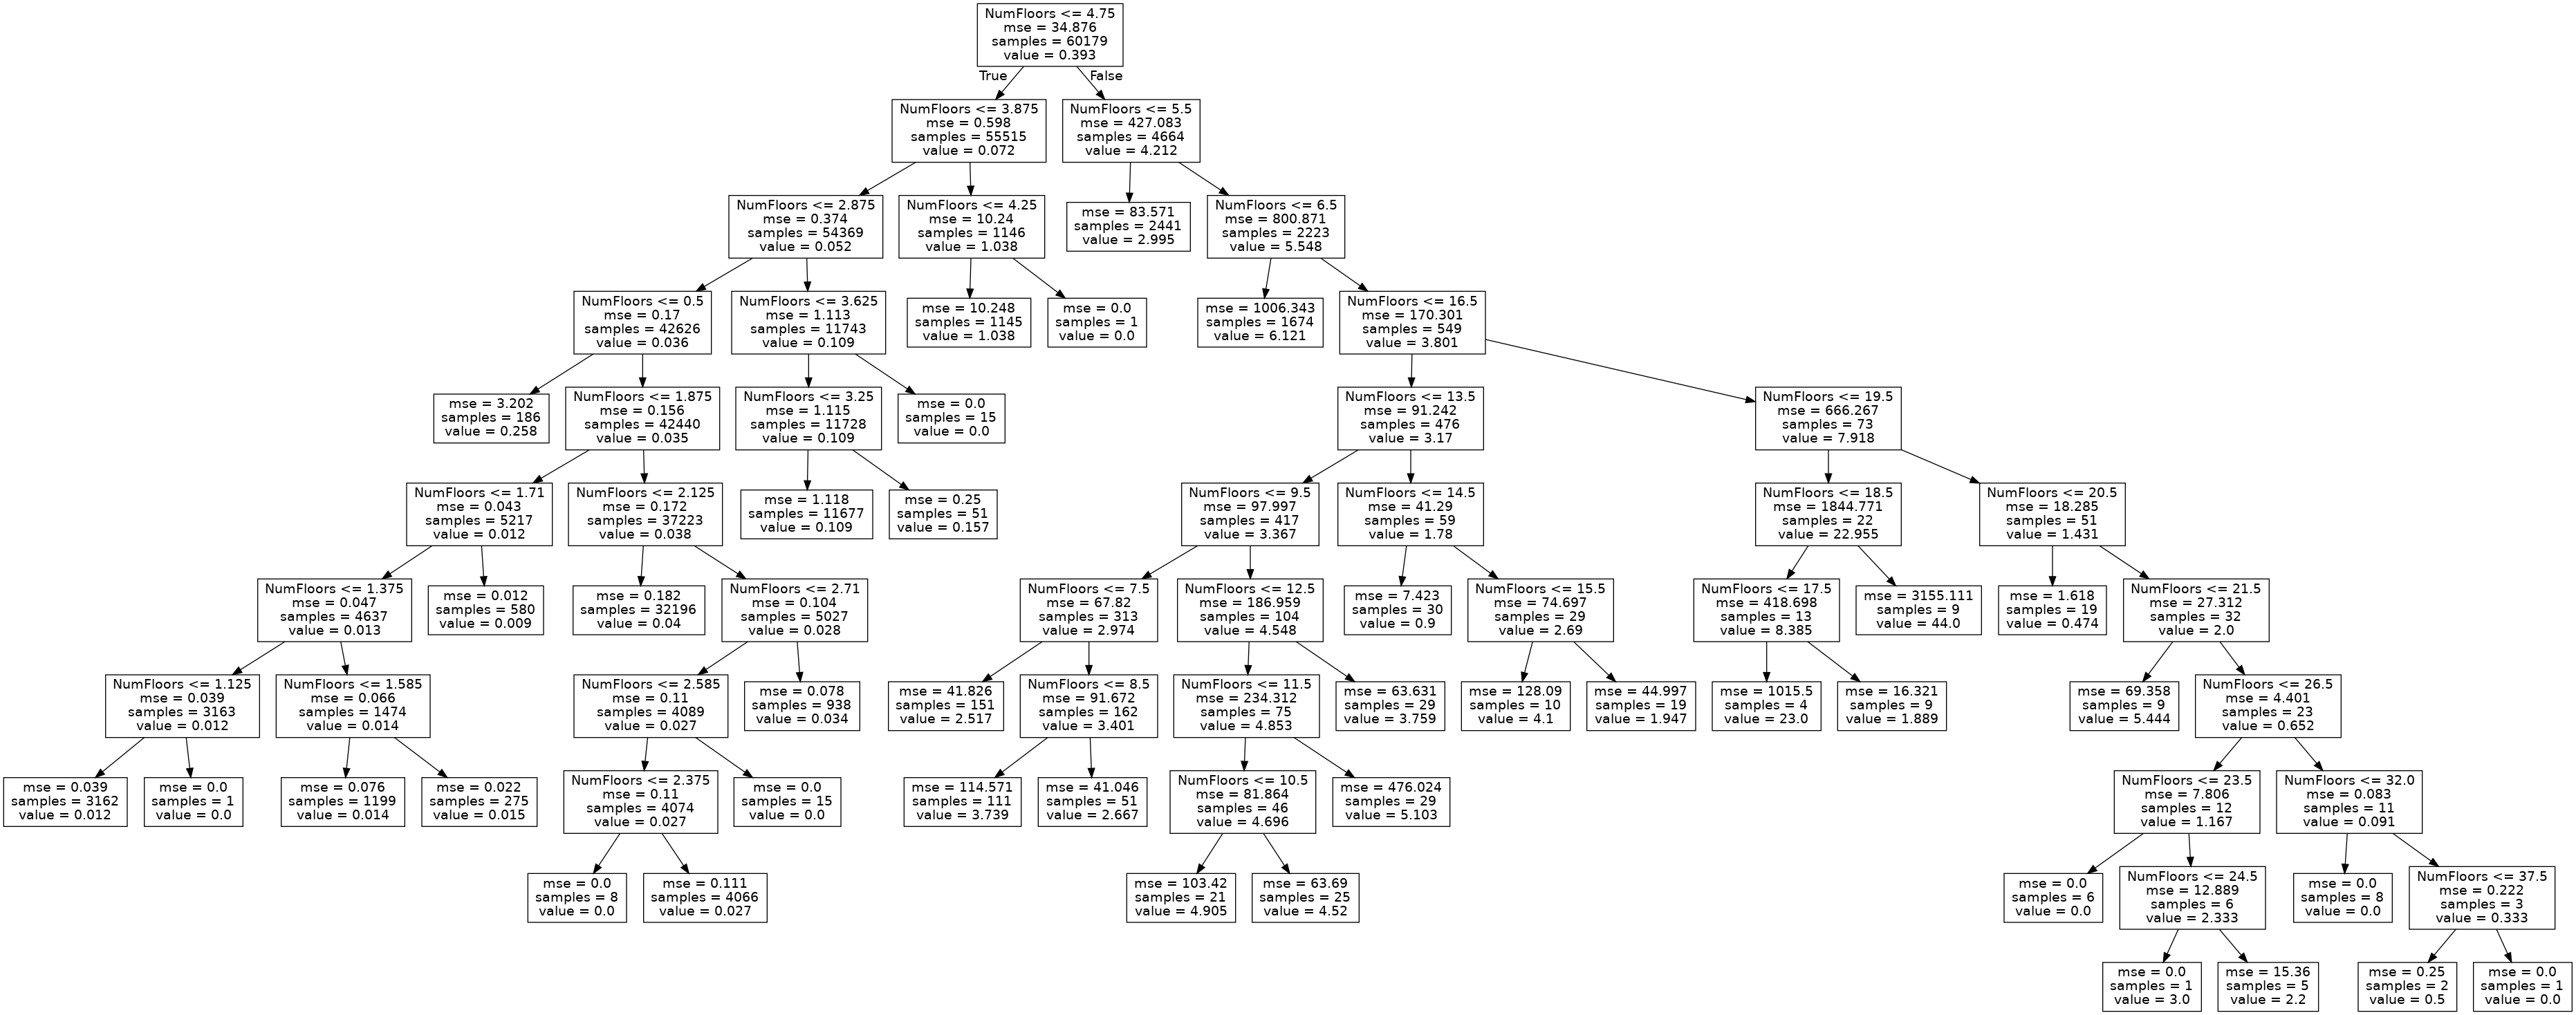

In [104]:
#import export_graphviz 
from sklearn.tree import export_graphviz 
import pydotplus
from IPython.display import Image  

# Visualize data
#export_graphviz(m, out_file ='tree.dot', 
#              feature_names =features)  
#graphviz.render("dot", "png", "tree.dot") 

# Create DOT data
dot_data = export_graphviz(m, out_file=None, 
                                feature_names=features)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())

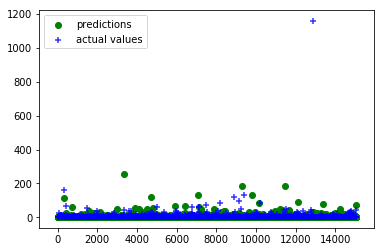

In [27]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(x_grid, y_pred, c='g', marker="o", label='predictions')
ax1.scatter(x_grid, y_test, c='b', marker="+", alpha=0.8, label='actual values')
plt.legend(loc='upper left');
plt.show()

In [28]:
df_analyze.head()

,Number of Complaints,NumFloors,ResArea,BuiltFAR,BldgArea,YearBuilt,BldgDepth
3,3.0,5.0,12500,5.00,12500,1931,85.0
4,0.0,5.0,6876,4.58,8595,1920,70.0
25,0.0,4.0,6784,2.71,6784,1920,75.0
28,4.0,5.0,9176,4.60,11500,1925,96.0
37,0.0,16.0,1306230,6.39,1306230,1956,48.0


In [31]:
#from test data result should be 3
m.predict([["5.0", "12500", "5.00", "12500", "1931", "85.0"]])


array([0.])

In [32]:
#from test data result should be 0
m.predict([["16.0", "1306230", "6.39", "1306230", "1956", "48.0"]])

array([0.])

In [38]:
# Produce a matrix to calculate prediction:
complain_data = [[5.0, 12500, 5.0, 12500, 1931, 85], # Client 1
               [4.0, 6784, 2.71, 6784, 1920, 75], # Client 2
               [5.0, 9176, 4.60, 11500, 1925, 96]]  # Client 3

# Show predictions
for i, complain in enumerate(m.predict(complain_data)):
    print ("Predicted number of complaints is ", complain)

Predicted number of complaints is  0.0
Predicted number of complaints is  0.0
Predicted number of complaints is  4.0


In [ ]:
Conclusion Remarks:
In this notebook, a predictive model is built using Regression Decision Tree to predict the number of future complaints.
Once a model has been trained on a given set of data, it can now be used to make predictions on new sets of input data. 
In the case of a decision tree regressor, the model has learned what the best questions to ask about the input data are, 
and can respond with a prediction for the target variable - number of complaints.